## mRKS method

Please check the original paper:\
\[1\] [Ryabinkin, Kohut and Staroverov, PRL 115, 083001 (2015)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.115.083001) \
\[2\] [Ospadov, Ryabinkin and Staroverov, J. Chem. Phys. 146, 084103 (2017)](https://doi.org/10.1063/1.4975990) \
\[3\] [Staroverov, Ospadov, Advances in Quantum Chemistry, Volume 79 (2019)](https://doi.org/10.1016/bs.aiq.2019.04.002).

First, build the input wavefunction using Psi4. Note that currently only Psi4.CIWavefunction supports two-particle density matrices (tpdm). CISD is used in this example.

In [1]:
import psi4
import matplotlib.pyplot as plt
import numpy as np

psi4.set_options({"save_jk" : True})
psi4.set_memory(int(2.50e9))
psi4.set_num_threads(10)
psi4.core.clean()

import n2v

import matplotlib as mpl
mpl.rcParams["font.size"] = 11
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["axes.edgecolor"] = "#eae8e9" 

In [2]:
H2O = psi4.geometry( 
""" 
O 0.         0.         0.
H -0.4607    1.8327     0.
H 1.8897     0.         0.
noreorient
nocom
units bohr
symmetry c1
""" )

psi4.set_options({"reference" : "rhf",
                  "opdm": True,
                  "tpdm": True,
                  'DFT_SPHERICAL_POINTS': 74,  # Usually specify the DFT spherical grid is highly recommended.
                  'DFT_RADIAL_POINTS': 56,  # See [https://psicode.org/psi4manual/master/dft.html] for options.
                 })  # Spin-Restricted

# IMPORTANT NOTE: ONLY psi4.CIWavefunction or RHF is supported.
wfn = psi4.properties("detci/cc-pcvdz", return_wfn=True, molecule=H2O, properties=["dipole"])[1]

inv = n2v.Inverter.from_wfn(wfn)

In [4]:
# Build 1D grid
x = np.linspace(-3,5,801)
y = [0]
z = [0]
grid, shape = inv.eng.grid.generate_grid(x,y,z)

# Run the calculation with requested grid
inv.invert("mRKS", vxc_grid=grid, opt_max_iter=30, frac_old=0.8, 
                init="scan", sing=(1e-7, 1e-4, 1e-7, 1e-4))

Memory taken by ERI integral matrix and 2pdm is about: 0.015 GB.
vxchole quadrature double integral starts (12284 points): ...........

Totally 12284 grid points takes 225.80s with max 256 points in a block.
Iter: 1, Density Change: 1.96e-03, Eigenvalue Change: 3.80e+00, Potential Change: 2.78e-01.
Iter: 2, Density Change: 3.90e-05, Eigenvalue Change: 8.89e-02, Potential Change: 8.96e-03.
Iter: 3, Density Change: 8.18e-06, Eigenvalue Change: 5.73e-03, Potential Change: 7.79e-03.
Iter: 4, Density Change: 4.56e-06, Eigenvalue Change: 5.75e-03, Potential Change: 7.43e-03.
Iter: 5, Density Change: 2.97e-06, Eigenvalue Change: 5.72e-03, Potential Change: 7.29e-03.
Iter: 6, Density Change: 2.35e-06, Eigenvalue Change: 5.66e-03, Potential Change: 7.20e-03.
Iter: 7, Density Change: 2.11e-06, Eigenvalue Change: 5.60e-03, Potential Change: 7.13e-03.
Iter: 8, Density Change: 2.01e-06, Eigenvalue Change: 5.54e-03, Potential Change: 7.07e-03.
Iter: 9, Density Change: 1.95e-06, Eigenvalue Change: 5.

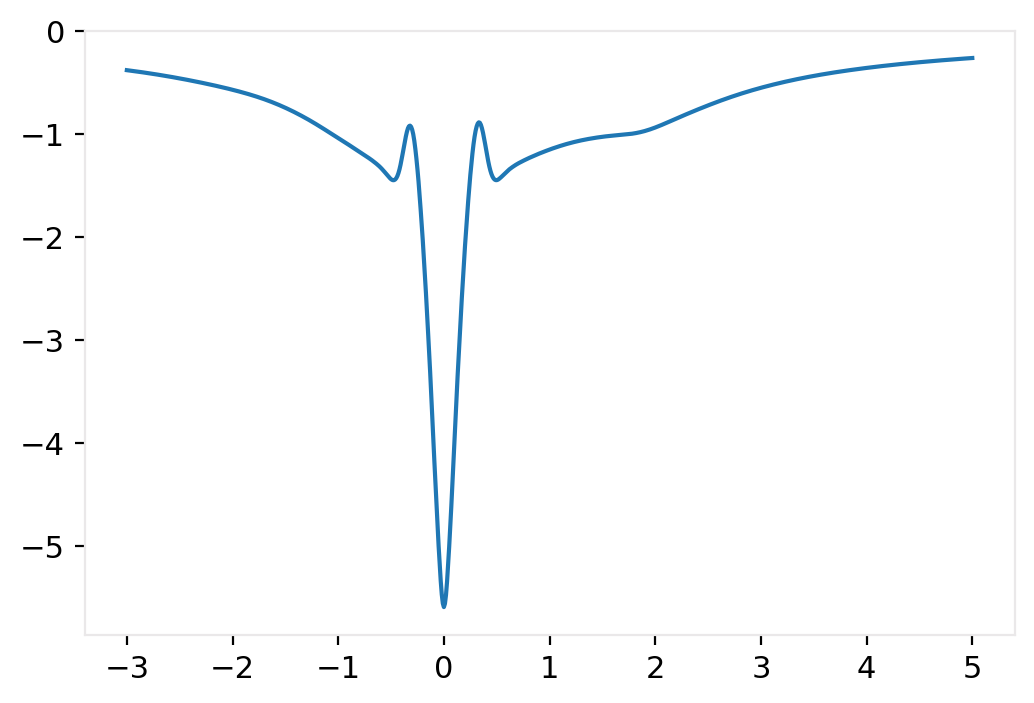

In [6]:
fig, ax = plt.subplots(dpi=200)
ax.plot(x, inv.grid_vxc, label="Inverted vxc")

In [ ]:
# The same potential can be visualized by running the calculation on a two or three dimensional grid. 
x = np.linspace(-5,5,501)
y = np.linspace(-5,5,501)
z = [0]
grid, shape = inverter.generate_grids(x,y,z)